In [ ]:
!pip install nco

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
https://www.earthinversion.com/utilities/Writing-NetCDF4-Data-using-Python/

In [ ]:
# Checking if time dimension is not there
chlor_all = xr.open_mfdataset('/content/testing/*nc', combine='by_coords')
chlor_all

In [ ]:
%%bash

git clone https://github.com/pangeo-data/tutorial-data.git

Cloning into 'tutorial-data'...


In [ ]:
import numpy as np
import xarray as xr
ds = xr.open_dataset('/content/drive/MyDrive/sst/NOAA_NCDC_ERSST_v3b_SST-1960.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 12)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 1960-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

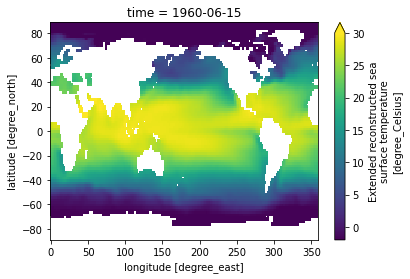

In [ ]:
sst = ds.sst
sst.sel(time='1960-06-15').plot(vmin=-2, vmax=30)

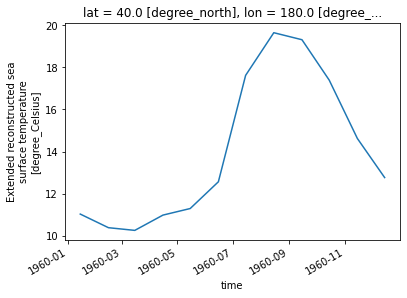

In [ ]:
sst.sel(lon=180, lat=40).plot()

In [ ]:
ds_all = xr.open_mfdataset('/content/drive/MyDrive/sst/*nc', combine='by_coords')
ds_all

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 dask.array<chunksize=(12, 89, 180), meta=np.ndarray>
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [ ]:
sst_clim = ds_all.sst.groupby('time.month').mean(dim='time')
sst_clim

<xarray.DataArray 'sst' (month: 12, lat: 89, lon: 180)>
dask.array<stack, shape=(12, 89, 180), dtype=float32, chunksize=(1, 89, 180), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

Text(0.5, 1.0, 'June minus July SST Climatology')

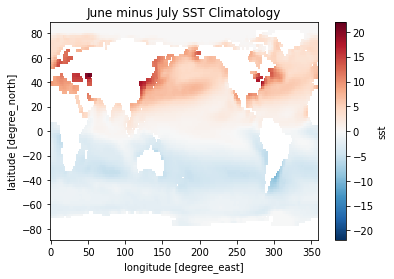

In [ ]:
import matplotlib.pyplot as plt
(sst_clim[6] - sst_clim[0]).plot()
plt.title('June minus July SST Climatology')

In [ ]:
sst_ts = ds_all.sst.sel(lon=300, lat=10)
sst_ts_annual = sst_ts.resample(time='A').mean(dim='time')
sst_ts_annual

<xarray.DataArray 'sst' (time: 57)>
dask.array<stack, shape=(57,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2016-12-31
    lat      float32 10.0
    lon      float32 300.0

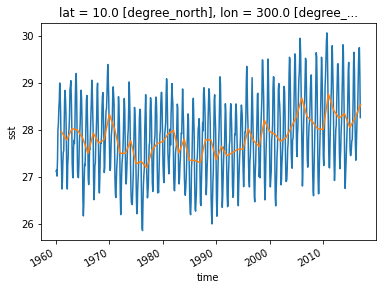

In [ ]:
sst_ts.plot()
sst_ts_annual.plot()